# Unbiased Die

This notebook accompanies the "Get Unbiased Die" problem on the discussion worksheet. The goal is to simulate a randomized process that transforms a biased random bit generator into an unbiased die roll. Rather than solving the problem analytically, this notebook provides an empirical perspective—letting students run the code and observe how close the output distribution gets to uniform. It’s a hands-on way to reinforce the idea that randomness can be corrected and analyzed through clever algorithmic design.

In [1]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# Function to generate a random probability distribution
def get_random_distribution():
    probabilities = np.random.dirichlet(np.ones(6))
    return probabilities

# Function to simulate unbiased die
def GetUnbiasedDie(probabilities, call_counts):
    def GetBiasedDie(probabilities):
        call_counts[0] += 1  # Increment the call count
        return np.random.choice(range(1, 7), p=probabilities)

    while True:
        A = [GetBiasedDie(probabilities) for _ in range(6)]
        if len(set(A)) == 6:  # Check if all elements in A are distinct
            return A[0]

# Simulation function
def simulate_get_unbiased_die(n, probabilities):
    results = []
    call_counts = []  # Track the number of calls to GetBiasedDie for each simulation

    for _ in range(n):
        call_count = [0]  # Track calls for this instance
        result = GetUnbiasedDie(probabilities, call_count)
        results.append(result)
        call_counts.append(call_count[0])  # Store the number of calls

    result_counts = Counter(results)
    return result_counts, call_counts

[0.14798289 0.20135102 0.13750365 0.1551147  0.02074417 0.33730356]


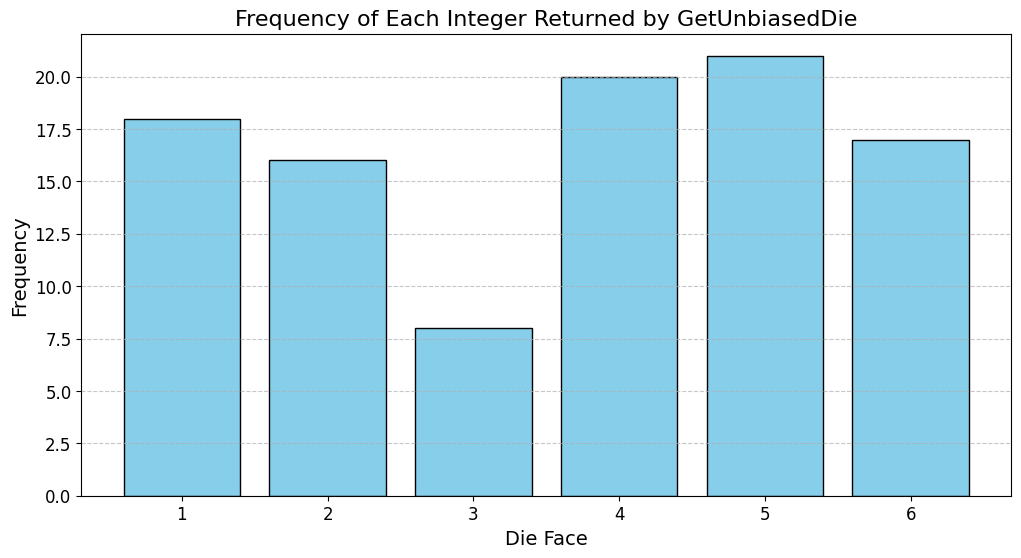

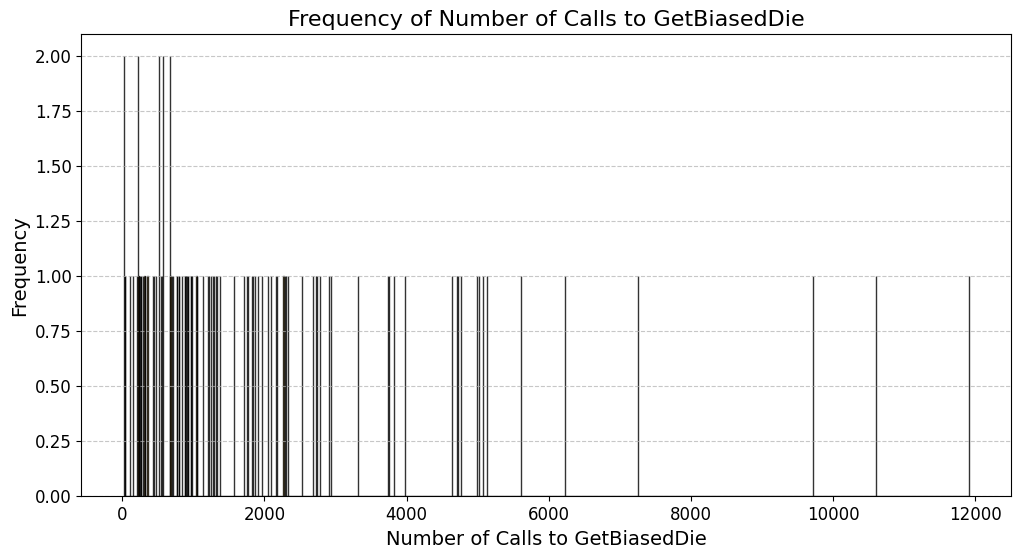

Average number of calls to GetBiasedDie: 1994.46
Expected number of calls to GetBiasedDie: 1873.9987892782922
Differences: 120.46121072170786


In [2]:
probabilities = get_random_distribution()
print(probabilities)

n = 100

# Simulate n times
result_counts, call_counts = simulate_get_unbiased_die(n, probabilities)

# Plot histogram of the frequency of each integer
faces = list(result_counts.keys())
frequencies = list(result_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(faces, frequencies, color='skyblue', tick_label=faces, edgecolor='black')
plt.xlabel('Die Face', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Each Integer Returned by GetUnbiasedDie', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Plot histogram of the number of calls to GetBiasedDie
plt.figure(figsize=(12, 6))
plt.hist(call_counts, bins=range(min(call_counts), max(call_counts) + 2), color='orange', edgecolor='black', alpha=0.8)
plt.xlabel('Number of Calls to GetBiasedDie', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Number of Calls to GetBiasedDie', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

avg_calls = sum(call_counts) / n
expected_calls = 1 / (120 * np.prod(probabilities))
print(f"Average number of calls to GetBiasedDie: {avg_calls:.2f}")
print(f"Expected number of calls to GetBiasedDie: {expected_calls}")
print(f"Differences: {abs(avg_calls - expected_calls)}")